In [5]:
import numpy as np
import pandas as pd

In [6]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [7]:
# Download Dataset from https://www.dropbox.com/scl/fo/v71bqw2zowgla028cwdh0/AEfemP4C8qQ2X5tTNXMCqUQ/Session%203?dl=0&preview=educationWage.xlsx&rlkey=rlkgo6o58ex2kjbiv4b7cr9nj&subfolder_nav_tracking=1
# and add it to colab

In [8]:
educationWageDf = pd.read_excel("./educationWage.xlsx")

In [10]:
educationWageDf

,Education,Wage
0,20,160
1,18,120
2,12,70
3,16,100
4,10,65
5,23,160
6,2,40
7,5,55


In [11]:
type(educationWageDf)

pandas.core.frame.DataFrame

In [12]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

<Axes: xlabel='Education', ylabel='Wage'>

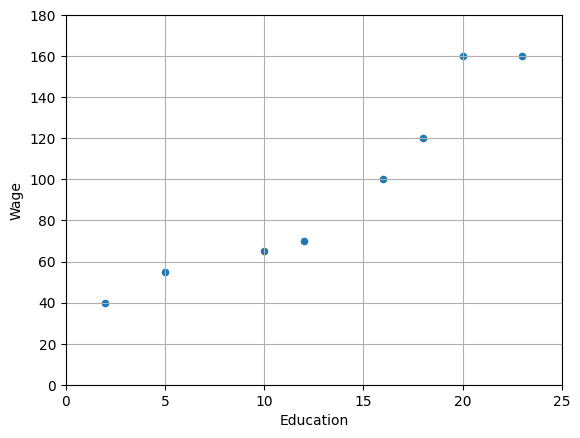

In [13]:
educationWageDf.plot.scatter(
    x = 'Education',
    y = 'Wage',
    xlim = (0, 25),
    ylim = (0, 180),
    grid = True
)


In [14]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

In [15]:
sm.add_constant(educationWageDf["Education"]), type(sm.add_constant(educationWageDf["Education"]))

(   const  Education
 0    1.0         20
 1    1.0         18
 2    1.0         12
 3    1.0         16
 4    1.0         10
 5    1.0         23
 6    1.0          2
 7    1.0          5,
 pandas.core.frame.DataFrame)

In [16]:
educationWageLiniarRgressionModel = sm.OLS(
  educationWageDf["Wage"],
  sm.add_constant(educationWageDf["Education"])
)


In [17]:
educationWageLiniarRgressionModelFit = educationWageLiniarRgressionModel.fit()

In [18]:
print(educationWageLiniarRgressionModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     57.64
Date:                Wed, 28 May 2025   Prob (F-statistic):           0.000272
Time:                        11:37:00   Log-Likelihood:                -32.114
No. Observations:                   8   AIC:                             68.23
Df Residuals:                       6   BIC:                             68.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1358     11.887      1.357      0.2

/Users/jason/.jjDataDir/~~asdf_SARAVA/installs/python/3.13.3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [19]:
educationWageLiniarRgressionModelFit.params

const        16.135762
Education     6.046358
dtype: float64

In [ ]:
# wage = b0 + b1 * Education

In [20]:
predictedWage = educationWageLiniarRgressionModelFit.predict(sm.add_constant(educationWageDf["Education"]))
predictedWage

0    137.062914
1    124.970199
2     88.692053
3    112.877483
4     76.599338
5    155.201987
6     28.228477
7     46.367550
dtype: float64

In [21]:
educationWageDf

,Education,Wage
0,20,160
1,18,120
2,12,70
3,16,100
4,10,65
5,23,160
6,2,40
7,5,55


In [25]:
educationWageDf['predictedWage'] = predictedWage
educationWageDf

,Education,Wage,predictedWage
0,20,160,137.062914
1,18,120,124.970199
2,12,70,88.692053
3,16,100,112.877483
4,10,65,76.599338
5,23,160,155.201987
6,2,40,28.228477
7,5,55,46.367550


In [27]:
testPredict = educationWageLiniarRgressionModelFit.predict([[1,15]])
testPredict

array([106.83112583])

In [28]:
import matplotlib.pyplot as plt


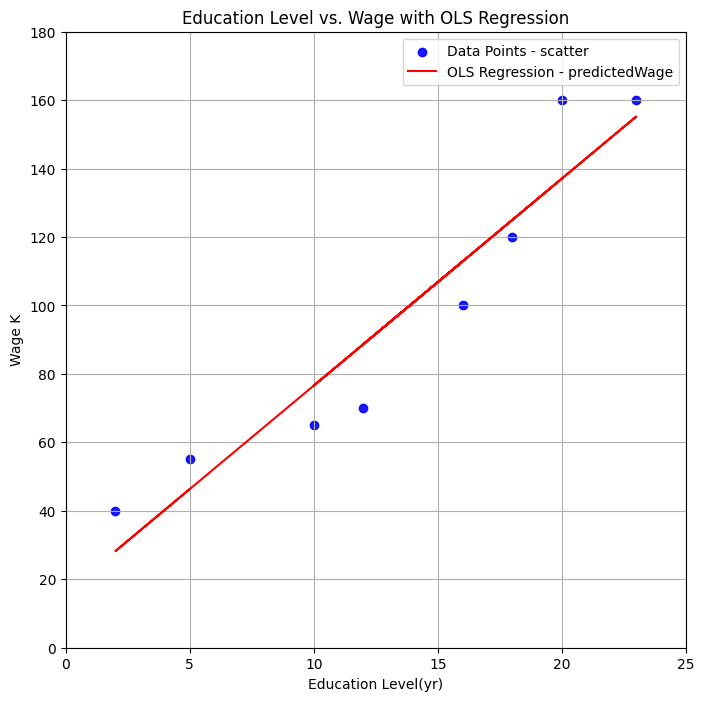

In [29]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  educationWageDf["Education"],
  educationWageDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage"],
  color='red',
  label='OLS Regression - predictedWage'
)
plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)

plt.gca().set_xlim([0, 25])
plt.gca().set_ylim([0, 180])


plt.show()

# Another way

In [ ]:
X = np.array([20, 18, 12, 16, 10, 23, 2, 5])
y = np.array([160, 120, 70 , 100, 65, 160, 40, 55])
X, y

In [ ]:
X = sm.add_constant(X)

In [ ]:
X

In [ ]:
model = sm.OLS(y, X).fit()


In [ ]:
print(model.summary())

In [ ]:
print("Coefficients:", model.params)

In [ ]:
predictions = model.predict([[1, 5], [1, 15]])
predictions

In [ ]:
def predicWage(intercept, slope, yearsOfExperience):
  return intercept + (slope * yearsOfExperience)

In [ ]:
predicWage(model.params[0], model.params[1], 5)

In [ ]:
predicWage(model.params[0], model.params[1], 15)

# Another way

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
educationWageDf

In [ ]:
educationWageLiniarRgressionModel2 = LinearRegression()

In [ ]:
educationWageDf["Education"], type(educationWageDf["Education"])

In [ ]:
educationWageDf[["Education"]], type(educationWageDf[["Education"]])

In [ ]:
educationWageLiniarRgressionModel2Fit = educationWageLiniarRgressionModel2.fit(
    educationWageDf[["Education"]],
    educationWageDf["Wage"]
)

In [ ]:
# Print the intercept and coefficient
print("Intercept:", educationWageLiniarRgressionModel2Fit.intercept_)
print("Coefficient:", educationWageLiniarRgressionModel2Fit.coef_[0])

In [ ]:
predictions1 = educationWageLiniarRgressionModel2Fit.predict(np.array([[5], [15]]))
predictions1

In [ ]:
predicWage(educationWageLiniarRgressionModel2Fit.intercept_, educationWageLiniarRgressionModel2Fit.coef_[0], 5)

In [ ]:
predicWage(educationWageLiniarRgressionModel2Fit.intercept_, educationWageLiniarRgressionModel2Fit.coef_[0], 15)

In [ ]:
predictedWage2 = educationWageLiniarRgressionModel2Fit.predict(educationWageDf[["Education"]])
educationWageDf['predictedWage2'] = predictedWage2
educationWageDf

In [ ]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  educationWageDf["Education"],
  educationWageDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage"],
  color='red',
  label='OLS Regression - predictedWage'
)
plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage2"],
  color='black',
  label='sklearn  Regression - predictedWage'
)
plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)

plt.gca().set_xlim([0, 25])
plt.gca().set_ylim([0, 180])


equation = f'Wage = {educationWageLiniarRgressionModel2Fit.coef_[0]:.2f} * Education + {educationWageLiniarRgressionModel2Fit.intercept_:.2f}'


plt.text(
    10, 120,
    equation,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=12,
    color="green",
    bbox=dict(facecolor='white', alpha=0.5)
)



plt.show()

# Real dataset

In [ ]:
import pandas as pd

Download it from [here](https://www.dropbox.com/scl/fi/1sc8ojfezlbrcaje42w0n/College.xlsx?rlkey=i3starhohiwkua8ekbjk3nb92&st=yd75jyvp&dl=0)

In [ ]:
collegeDf = pd.read_excel("./College.xlsx")

In [ ]:
collegeDf.head()

In [ ]:
collegeDf.tail()

In [ ]:
collegeDf.shape

In [ ]:
collegeDf.size

In [ ]:
collegeDf.describe()

In [ ]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  collegeDf["Cost"],
  collegeDf["Earnings"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Cost')
plt.ylabel('Earnings')
plt.legend()
plt.grid(True)



plt.show()

In [ ]:
sm.add_constant(collegeDf['Cost']), type(sm.add_constant(collegeDf['Cost']))

In [ ]:
earningOthersOlsModelFit1 = sm.OLS(
  collegeDf["Earnings"],
  sm.add_constant(collegeDf['Cost'])
).fit()

In [ ]:
print(earningOthersOlsModelFit1.summary())

In [ ]:
predictedEarning1 = earningOthersOlsModelFit1.predict(sm.add_constant(collegeDf["Cost"]))
collegeDf['predictedEarning1'] = predictedEarning1
collegeDf

In [ ]:
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  collegeDf["Cost"],
  collegeDf["Earnings"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.plot(
  collegeDf["Cost"],
  collegeDf["predictedEarning1"],
  color='red',
  label='OLS 1'
)

plt.legend()

plt.show()

In [ ]:
collegeDf

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(
  collegeDf["Cost"],
  collegeDf["Grad"],
  collegeDf["Earnings"],
  color = "green"
)
plt.title("Cost,Grad -> Earnings")
ax.set_xlabel('Cost')
ax.set_ylabel('Grad')
ax.set_zlabel('Earnings')

# show plot
plt.show()

In [ ]:
collegeDf[['Cost', 'Grad']], type(collegeDf[['Cost', 'Grad']])

In [ ]:
sm.add_constant(collegeDf[['Cost', 'Grad']]), type(sm.add_constant(collegeDf[['Cost', 'Grad']]))

In [ ]:
earningOthersOlsModelFit2 = sm.OLS(
  collegeDf["Earnings"],
  sm.add_constant(collegeDf[['Cost', 'Grad']])
).fit()

In [ ]:
print(earningOthersOlsModelFit2.summary())

In [ ]:
predictedEarning2 = earningOthersOlsModelFit2.predict(
  sm.add_constant(collegeDf[['Cost', 'Grad']])
)
collegeDf['predictedEarning2'] = predictedEarning2
collegeDf

In [ ]:
# if 'google.colab' in str(get_ipython()):
#         get_ipython().run_line_magic('matplotlib', 'inline')

# %matplotlib notebook
# # %matplotlib notebook
%matplotlib inline

In [ ]:
# Extracting coefficients
intercept = earningOthersOlsModelFit2.params['const']
coef_cost = earningOthersOlsModelFit2.params['Cost']
coef_grad = earningOthersOlsModelFit2.params['Grad']

# Create 3D grid for plotting
cost_range = np.linspace(collegeDf['Cost'].min(), collegeDf['Cost'].max(), 100)
grad_range = np.linspace(collegeDf['Grad'].min(), collegeDf['Grad'].max(), 100)
cost_grid, grad_grid = np.meshgrid(cost_range, grad_range)

# Calculate predicted earnings for each combination of cost and grad
earnings_predicted = intercept + coef_cost * cost_grid + coef_grad * grad_grid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(collegeDf['Cost'], collegeDf['Grad'], collegeDf['Earnings'], color='blue', label='Actual Earnings')

# Plotting the fitted plane
ax.plot_surface(cost_grid, grad_grid, earnings_predicted, color='red', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Cost')
ax.set_ylabel('Grad')
ax.set_zlabel('Earnings')



plt.title('Cost and Grad vs. Earnings with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=0, azim=0)  # Set the elevation and azimuth angles
plt.show()



In [ ]:
collegeDf

In [ ]:
earningOthersOlsModelFit3 = sm.OLS(
  collegeDf["Earnings"],
  sm.add_constant(collegeDf[['Cost', 'Grad','Debt']])
).fit()

In [ ]:
print(earningOthersOlsModelFit3.summary())

In [ ]:
print(earningOthersOlsModelFit2.summary())

In [ ]:
predictedEarning3 = earningOthersOlsModelFit3.predict(
  sm.add_constant(collegeDf[['Cost', 'Grad', 'Debt']])
)
collegeDf['predictedEarning3'] = predictedEarning3
collegeDf